In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from os.path import join
from glob import glob

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [50]:
import matplotlib.lines as lines
plt.rcParams["axes.axisbelow"] = False

# Chromosomal connectivity

Taking the multilayer networks of healthy and breast cancer, we show how chromosomal connectivity:

1. Is **almost** constant in healthy layers
2. "Explodes" in breast cancer

In [4]:
DATA = "/Users/rdora/breast_cancer/data/"
FIG = "/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/"

In [5]:
df = pd.read_csv(join(DATA, "netparams_tidy.csv"))

In [6]:
df = df[(df.Param=="A.A") & (df.Tissue.isin(["Healthy", "Basal"]))]

In [7]:
df = df[df.Layer >= 0]

In [38]:
lines.Line2D?

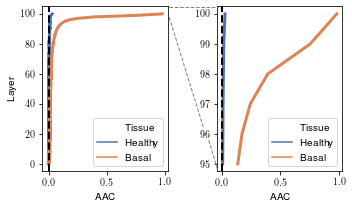

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(5, 3))

with sns.color_palette('deep'):
    sns.lineplot(x='Value', y='Layer', hue='Tissue', data=df,
                ax=axs[0], linewidth=3)
    sns.lineplot(x='Value', y='Layer', hue='Tissue', data=df[(df.Layer >= 95)],
                ax=axs[1], linewidth=3)
fig.tight_layout()

# 0 discontinous line
axs[0].axvline(0, linewidth=2, c='k', linestyle='--')
axs[1].axvline(0, linewidth=2, c='k', linestyle='--')

# Change x labels
axs[0].set_xlabel('AAC')
axs[1].set_xlabel('AAC')

# Remove second plot y label
axs[1].set_ylabel("")
l1 = lines.Line2D(
    [0.48, 0.615], [0.945, 0.945], transform=fig.transFigure, figure=fig,
    linewidth=1, linestyle="--", color="gray")
l2 = lines.Line2D(
    [0.48, 0.575], [0.9, 0.39], transform=fig.transFigure, figure=fig,
    linewidth=1, linestyle="--", color="gray")
l3 = lines.Line2D(
    [0.59, 0.615], [0.33, 0.19], transform=fig.transFigure, figure=fig,
    linewidth=1, linestyle="--", color="gray")
fig.lines.extend([l1, l2, l3])
# Savefig
fig.savefig(join(FIG, "chromosomal_connectivity.png"),
           dpi=300)

## Mean square error

In [71]:
# Average and mean square error from random chromosomal connectivity

mean_h = df[df['Tissue']=='Healthy'].Value.mean()
mean_b = df[df['Tissue']=='Basal'].Value.mean()

print(f"Mean healthy AAC: {mean_h}")
print(f"Mean basal AAC: {mean_b}")

z = np.zeros(101)
mse_h = mean_squared_error(z, df[df.Tissue=='Healthy'].Value.values)
mse_b = mean_squared_error(z, df[df.Tissue=='Basal'].Value.values)

print(f"MSE healthy AAC from 0: {mse_h}")
print(f"MSE basal AAC from 0: {mse_b}\n")

# Same but for top 5 layers
mean_h = df[(df['Tissue']=='Healthy') & (df.Layer >= 95)].Value.mean()
mean_b = df[(df['Tissue']=='Basal') & (df.Layer >= 95)].Value.mean()

z = np.zeros(6)
mse_h = mean_squared_error(z, df[(df.Tissue=='Healthy') & (df.Layer >= 95)].Value.values )
mse_b = mean_squared_error(z, df[(df.Tissue=='Basal') & (df.Layer >= 95)].Value.values)

print(f"Top 10 Mean healthy AAC: {mean_h}")
print(f"Top 10 Mean basal AAC: {mean_b}")

print(f"Top 10 MSE healthy AAC from 0: {mse_h}")
print(f"Top 10 MSE basal AAC from 0: {mse_b}\n")

Mean healthy AAC: 0.0038484080739092483
Mean basal AAC: 0.04723368114806523
MSE healthy AAC from 0: 3.158856482714501e-05
MSE basal AAC from 0: 0.018598470901857626

Top 10 Mean healthy AAC: 0.016350678906956805
Top 10 Mean basal AAC: 0.4468958045334505
Top 10 MSE healthy AAC from 0: 0.00031027198105546325
Top 10 MSE basal AAC from 0: 0.2981974546820801



In [65]:
df[df['Layer']==0]

,Tissue,Layer,Param,Value
1589,Healthy,0,A.A,-0.000644
2029,Basal,0,A.A,-0.006283


In [51]:
df[(df.Tissue=='Healthy') & (df.Value <= 0.001)]

,Tissue,Layer,Param,Value
1552,Healthy,3,A.A,0.000303
1558,Healthy,8,A.A,-0.000053
1566,Healthy,9,A.A,-0.000202
1581,Healthy,19,A.A,0.000942
1585,Healthy,1,A.A,0.000874
1589,Healthy,0,A.A,-0.000644
1624,Healthy,13,A.A,0.000775
1627,Healthy,33,A.A,0.000976
1631,Healthy,16,A.A,0.000544
